<h1><b>ML Intern Project: Predicting Car Selling Prices</h1></b>

<h2>Problem Overview: Given a dataset of Cars, predict its selling price</h2>

<b><h3>First Step : Handle Basic Imports</h3></b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



<b><h3>Second Step:Use Pandas to Load the Data</h3></b>

In [2]:
dataset=pd.read_csv(r"../data/car.csv")
dataset.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage(km/ltr/kg)  engine  \
0  Individual       Manual   First Owner               23.40  1248.0   
1  Individual       Manual  Second Owner               21.14  1498.0   
2  Individual       Manual   Third Owner               17.70  1497.0   
3  Individual       Manual   First Owner               23.00  1396.0   
4  Individual       Manual   First Owner               16.10  1298.0   

  max_power  seats  
0        74    5.0  
1    103.52    5.0  
2        78    5.0  
3        90    5.0  
4      88.2    5.0

In [3]:
#No of rows
print(len(dataset))
print(dataset.dtypes)

8128
name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object


In [82]:
dataset.describe()

age  selling_price     km_driven         fuel  seller_type  \
count  8128.000000   8.128000e+03  8.128000e+03  8128.000000  8128.000000   
mean     11.195989   6.382718e+05  6.981951e+04     0.569636     0.196604   
std       4.044249   8.062534e+05  5.655055e+04     0.535969     0.464810   
min       5.000000   2.999900e+04  1.000000e+00     0.000000     0.000000   
25%       8.000000   2.549990e+05  3.500000e+04     0.000000     0.000000   
50%      10.000000   4.500000e+05  6.000000e+04     1.000000     0.000000   
75%      14.000000   6.750000e+05  9.800000e+04     1.000000     0.000000   
max      42.000000   1.000000e+07  2.360457e+06     3.000000     2.000000   

       transmission        owner  mileage(km/ltr/kg)      engine    max_power  \
count   8128.000000  8128.000000         8128.000000  8128.00000  8128.000000   
mean       0.129183     0.462229           19.418783  1452.89813    91.264982   
std        0.335423     0.721824            3.981875   498.19672    35.376388   
min        0.000000     0.000000            0.000000   624.00000     0.000000   
25%        0.000000     0.000000           16.800000  1197.00000    68.100000   
50%        0.000000     0.000000           19.418783  1248.00000    82.000000   
75%        0.000000     1.000000           22.277500  1582.00000   101.250000   
max        1.000000     4.000000           42.000000  3604.00000   400.000000   

             seats  
count  8128.000000  
mean      5.405389  
std       0.948874  
min       2.000000  
25%       5.000000  
50%       5.000000  
75%       5.000000  
max      14.000000

<h5>The selling price or the target variable has very skewed range , so applying logarithmic transformation can help the model to generalize</h5>

<h4> Checking The Columns</h4>

In [4]:
dataset.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

<h4>Here, I used a large language model (specifically ChatGPT) to help me understand the meaning of these columns. I also provided it with some context so it can follow the analysis and later offer valuable insights for visualization or prediction.</h4>



<h3>Third step:Clean the Data</h3>

In [5]:
#Firstly, check for any null data
print(dataset.isna().sum())

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64


<h3>It is clear that there are multiple missing/NULL values in the dataset. This can cause problems, so managing it is a must</h3>
<h4>Now we must decide whether to impute using mean or median</h4>

In [6]:
#Firstly, convert the max_power(str) column to a float column

dataset["max_power"] = pd.to_numeric(dataset["max_power"], errors="coerce")


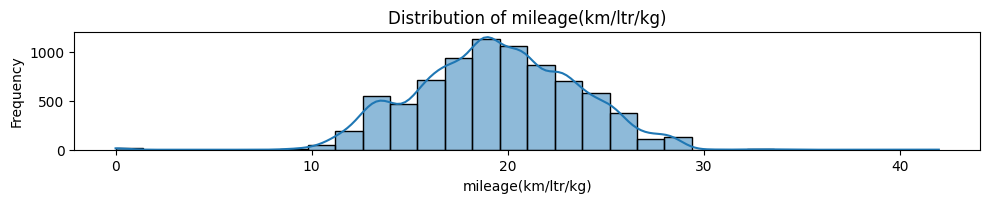

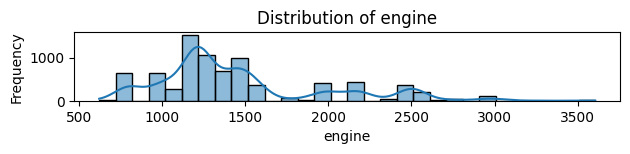

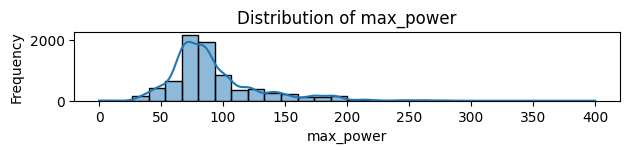

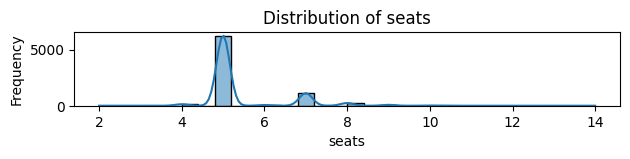

In [7]:
null_columns=["mileage(km/ltr/kg)","engine","max_power","seats"]

plt.figure(figsize=(10,7))

for index,val in enumerate(null_columns):
    plt.subplot(4,1,index+1)

    sns.histplot(dataset[val], kde=True, bins=30)
    plt.title(f'Distribution of {val}')
    plt.xlabel(val)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

<h4>Here, I used a LLM to provide me the best way to check for optimal data imputation method(mean,median,mode). From the plot, since the curve for mileage is normal, mean is applicable and engine is clearly skewed with long tail in the right, so median is applicable</h4>

In [8]:
#Lets check the skewness numerically
for i in null_columns:
    skew_value = dataset[i].skew()
    print(f"Skewness of {i}: {skew_value:.2f}")


Skewness of mileage(km/ltr/kg): -0.14
Skewness of engine: 1.14
Skewness of max_power: 1.62
Skewness of seats: 1.97


<h4> From this insight, lets use mean for mileage, median for engine and max_power, and mode for seats, as there are few categorical values</h4>

In [9]:
dataset["mileage(km/ltr/kg)"]=dataset["mileage(km/ltr/kg)"].fillna(dataset["mileage(km/ltr/kg)"].mean())

dataset["engine"]=dataset["engine"].fillna(dataset["engine"].median())

dataset["max_power"]=dataset["max_power"].fillna(dataset["max_power"].median())

dataset["seats"]=dataset["seats"].fillna(dataset["seats"].median())

<h4>Lets check null values once again</h4>

In [13]:
dataset.isna().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

<h4>Here, I notice some important columns like fuel, owner, transmission, and seller_type are in text format. For Machine Learning models, converting them to a numeric format is must. </h3>

In [14]:
#Check for unique values in each text-column
text_columns=["fuel","owner","transmission","seller_type"]

for i in text_columns:
    print(f"Unique Values of {i}: {set(dataset[i])}")

Unique Values of fuel: {'Diesel', 'LPG', 'CNG', 'Petrol'}
Unique Values of owner: {'Fourth & Above Owner', 'Test Drive Car', 'Second Owner', 'First Owner', 'Third Owner'}
Unique Values of transmission: {'Manual', 'Automatic'}
Unique Values of seller_type: {'Dealer', 'Individual', 'Trustmark Dealer'}


<h4>Let's map the text to numbers</h4>

In [10]:
fuel_map = {'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3}
dataset['fuel'] = dataset['fuel'].map(fuel_map)


owner_map = {
    'First Owner': 0,
    'Second Owner': 1,
    'Third Owner': 2,
    'Fourth & Above Owner': 3,
    'Test Drive Car': 4  
}
dataset['owner'] = dataset['owner'].map(owner_map)

dataset['transmission'] = dataset['transmission'].map({'Manual': 0, 'Automatic': 1})

seller_map = {'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2}
dataset['seller_type'] = dataset['seller_type'].map(seller_map)



<h5>For better model generalization, lets subtract the bought year from the current year to get the age of the car</h5>

In [11]:
dataset["year"]=2025-dataset["year"]
dataset.rename(columns={"year":"age"},inplace=True)

In [12]:
dataset.head()

name  age  selling_price  km_driven  fuel  \
0        Maruti Swift Dzire VDI   11         450000     145500     1   
1  Skoda Rapid 1.5 TDI Ambition   11         370000     120000     1   
2      Honda City 2017-2020 EXi   19         158000     140000     0   
3     Hyundai i20 Sportz Diesel   15         225000     127000     1   
4        Maruti Swift VXI BSIII   18         130000     120000     0   

   seller_type  transmission  owner  mileage(km/ltr/kg)  engine  max_power  \
0            0             0      0               23.40  1248.0      74.00   
1            0             0      1               21.14  1498.0     103.52   
2            0             0      2               17.70  1497.0      78.00   
3            0             0      0               23.00  1396.0      90.00   
4            0             0      0               16.10  1298.0      88.20   

   seats  
0    5.0  
1    5.0  
2    5.0  
3    5.0  
4    5.0

<h3><b>Fourth Step:Exploratory Data Analysis and Data Visualization</h3></b>

<h4>Let's plot a correlation matrix</h4>

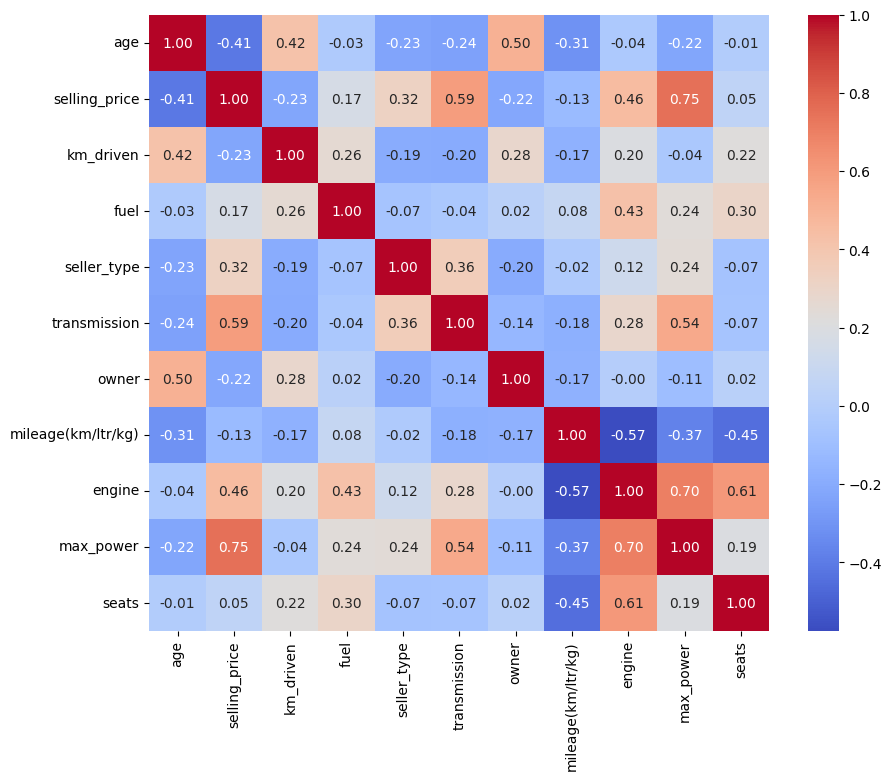

In [13]:
correlation_matrix=dataset.drop(columns=["name"]).corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.show()

<h4>Let's plot scatter plots for continuous values against the selling price</h4>

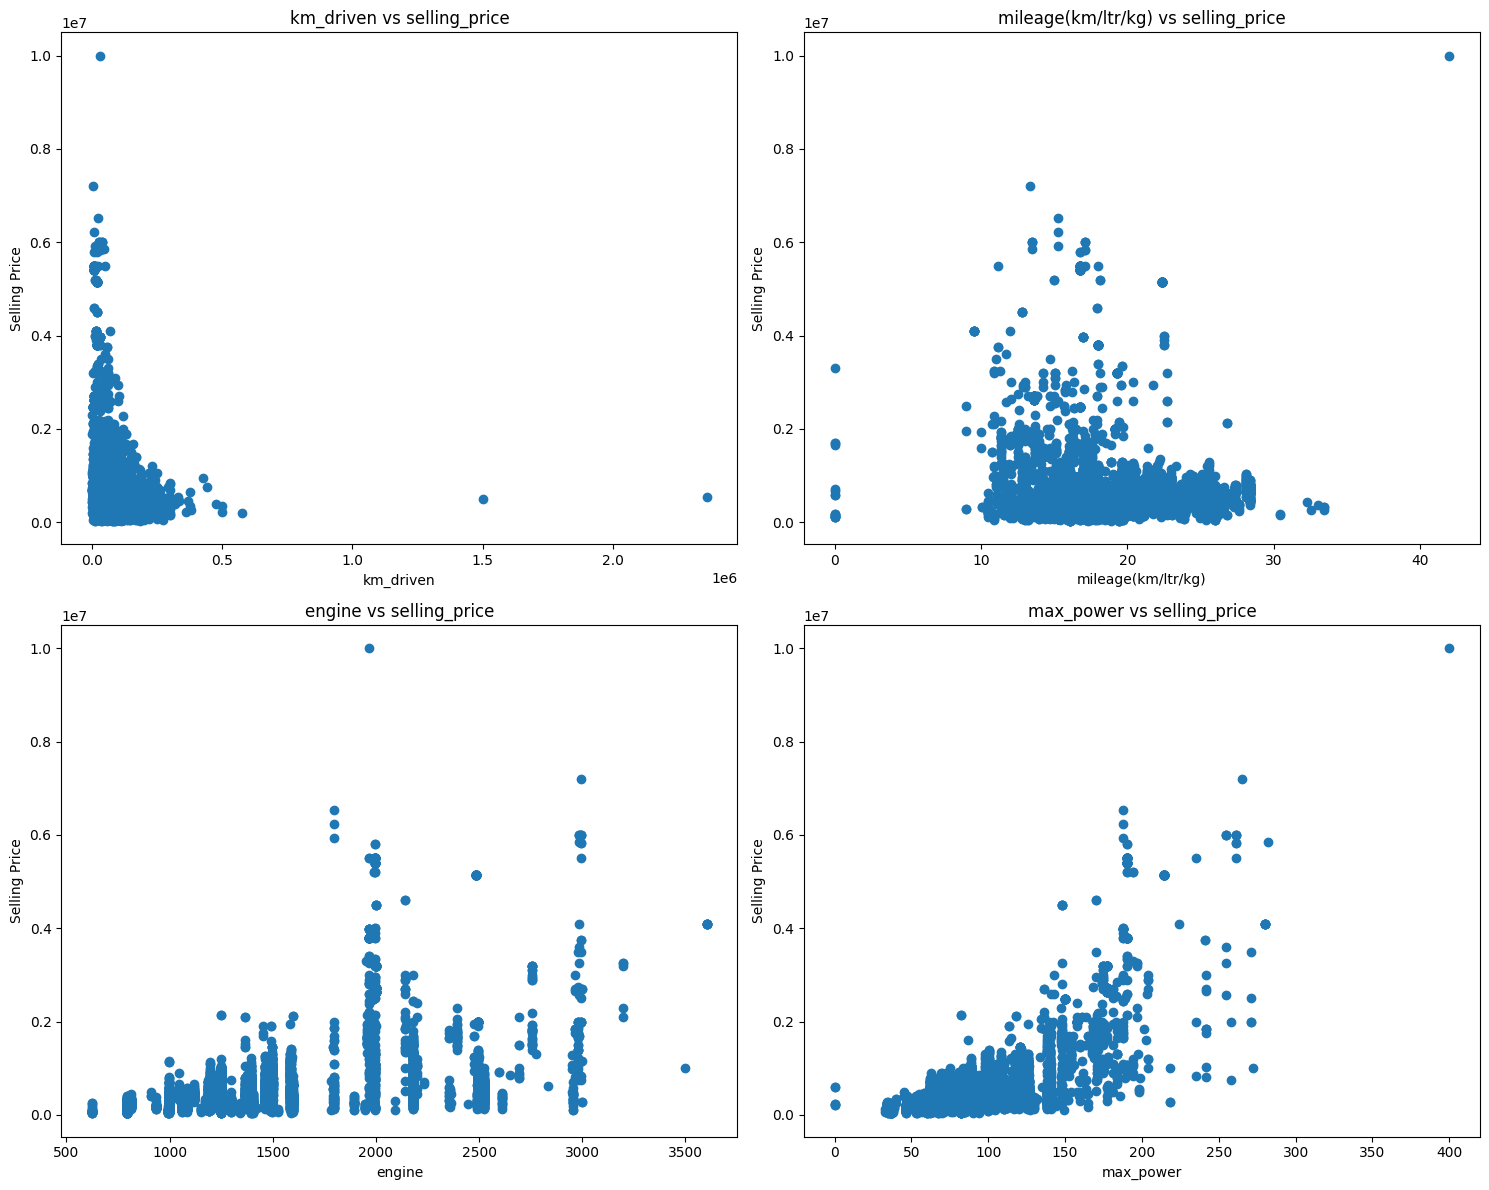

In [14]:
continuous_columns=["km_driven","mileage(km/ltr/kg)","engine","max_power"]

plt.figure(figsize=(15,12))
for ind,col in enumerate(continuous_columns):
    plt.subplot(2,2,ind+1)

    plt.scatter(dataset[col],dataset["selling_price"])
    plt.xlabel(col)
    plt.ylabel("Selling Price")
    plt.title(f"{col} vs selling_price")
    plt.tight_layout()

<h5> Here, km_driven vs selling price seeems logarithmic decay ,mileage has very weak correlation to selling_price, moderate correlation between engine and sp, and expoential graph of max_power vs sp</h5>

<h4> I asked an LLM for more kinds of plot for continuous features and it suggested me the following:</h4>

<h4>Histogram + KDE</h4>

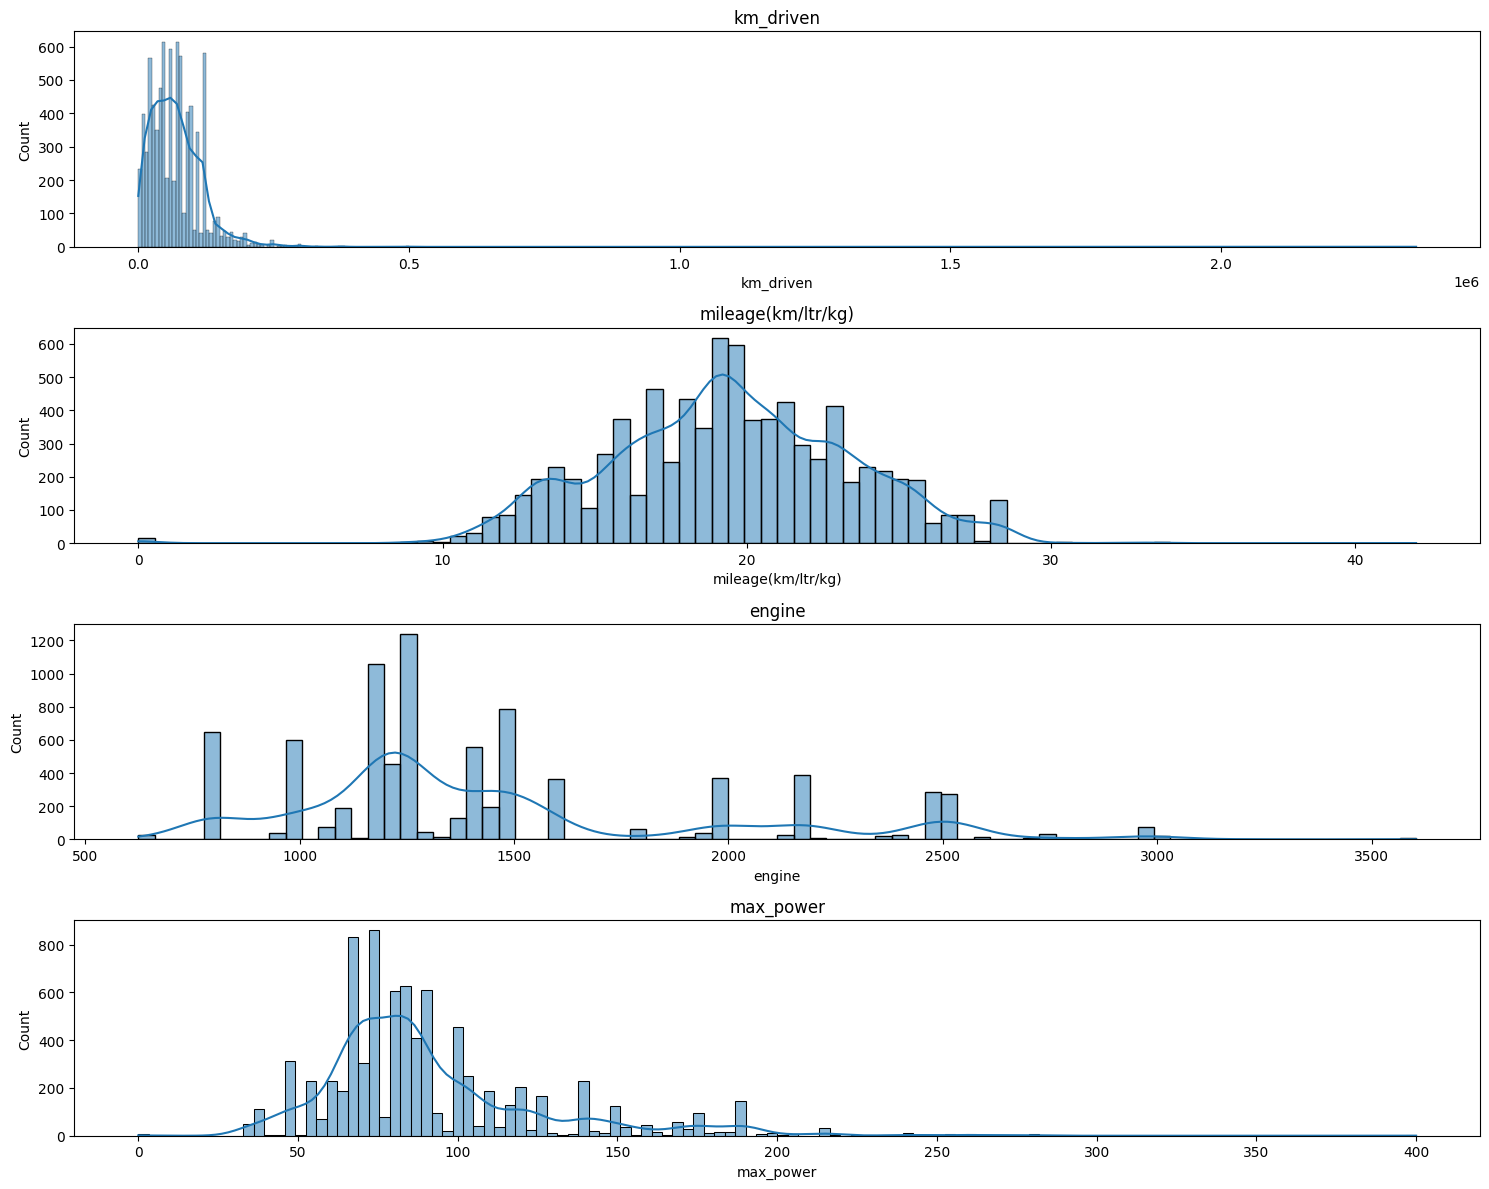

In [15]:

plt.figure(figsize=(15,12))
for ind,col in enumerate(continuous_columns):
    plt.subplot(4,1,ind+1)

    sns.histplot(dataset[col],kde=True)
    plt.xlabel(col)
   
    plt.title(f"{col}")
    plt.tight_layout()

<h5> From these figures, it's clear that km_driven and mileage have no noticeable outliers, but engine and max_power have greater outlier count , but that is probably due to high end - high speed cars , so they may be valuable outliers</h5>

<h4> Let's analyze the categorical features</h4>

<h4>Box Plots</h4>

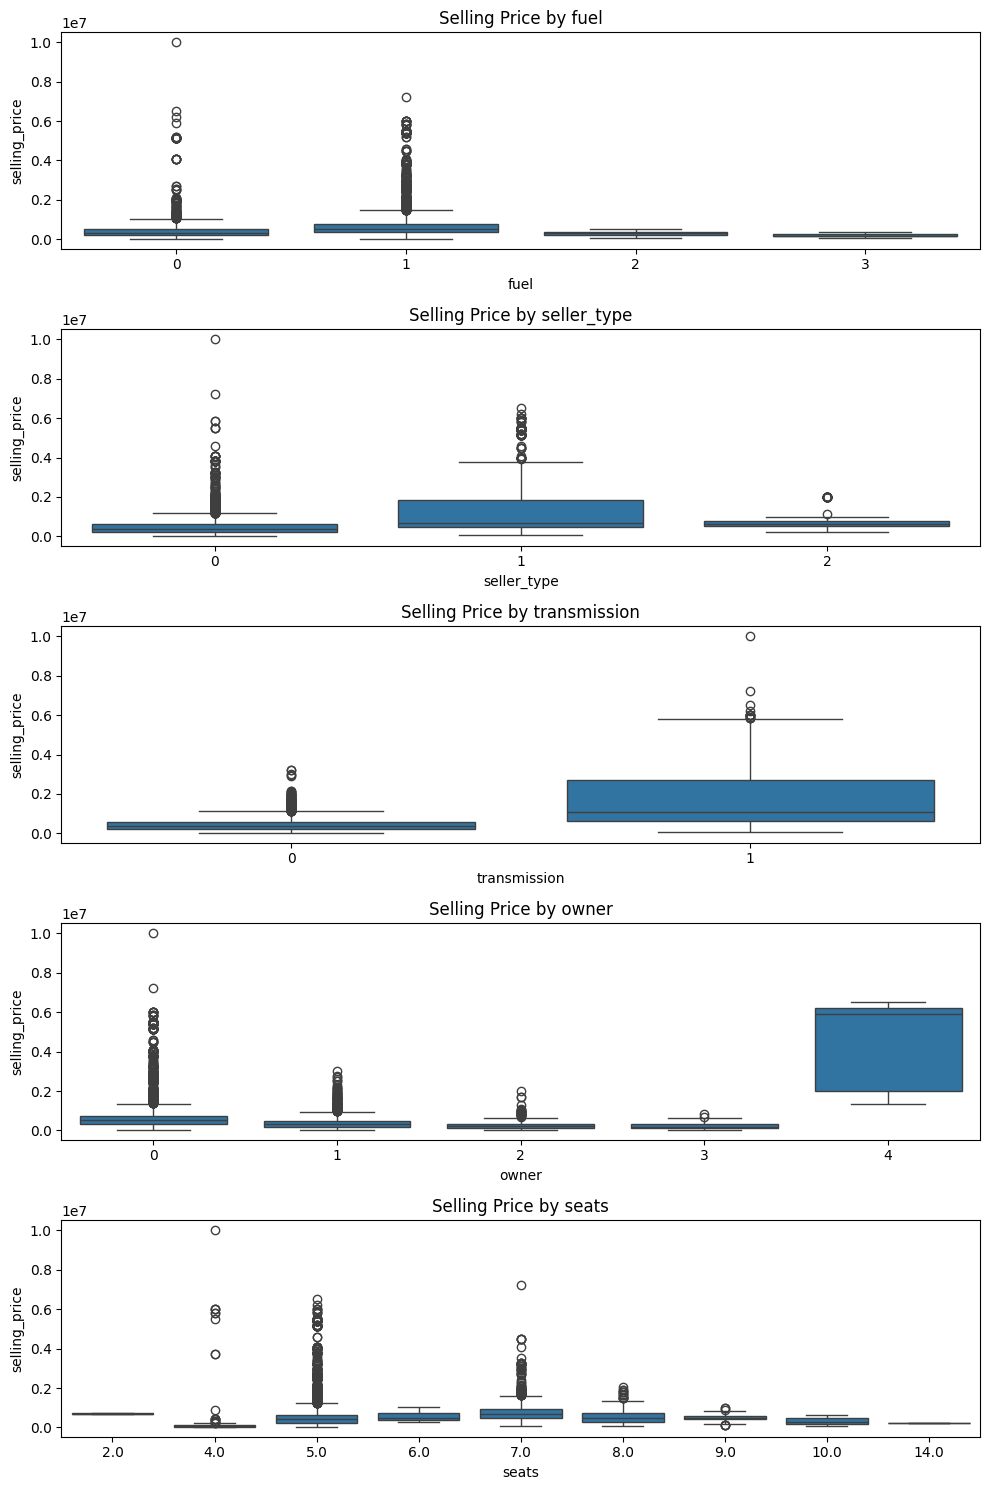

In [16]:
categorical_columns=["fuel","seller_type","transmission","owner","seats"]

plt.figure(figsize=(10,15))

for ind,col in enumerate(categorical_columns):
    plt.subplot(5,1,ind+1)

    sns.boxplot(x=col, y='selling_price', data=dataset)
    plt.title(f'Selling Price by {col}')
       

    plt.tight_layout()


<h5>This plot clearly highlights the distribution of values</h5>

<h3><b>Fifth Step:Data Normalization and splitting</h3></b>

<h4>Handle Imports</h4>

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<h5>Before splitting, apply logarithmic function to target variable to tackle skewness</h5>

In [106]:
dataset["selling_price"]=np.log1p(dataset["selling_price"])
dataset["km_driven"]=np.log1p(dataset["km_driven"])

<h4>Split into train,val and test</h4>

In [107]:
data_x= np.array(dataset.drop(columns=["name","selling_price"]))
data_y= np.array(dataset["selling_price"])
trainVal_x,test_x,trainVal_y,test_y=train_test_split(data_x,data_y,test_size=0.33,random_state=41)

train_x,val_x,train_y,val_y=train_test_split(trainVal_x,trainVal_y,test_size=0.15,random_state=41)

In [108]:
print(f"Length of training data :{len(train_x)}")
print(f"Length of testing data :{len(test_x)}")
print(f"Length of validation data :{len(val_x)}")

Length of training data :4628
Length of testing data :2683
Length of validation data :817


<h4>Standarize the data</h4>

In [109]:
feature_scaler=StandardScaler()
output_scaler=StandardScaler()


#Scale the features
train_x=feature_scaler.fit_transform(train_x)
test_x=feature_scaler.transform(test_x)
val_x=feature_scaler.transform(val_x)

#Scale the selling price(output)
train_y=output_scaler.fit_transform(train_y.reshape(-1,1))
test_y=output_scaler.transform(test_y.reshape(-1,1))
val_y=output_scaler.transform(val_y.reshape(-1,1))


<h3><b>Sixth Step:Model(s) Building</b></h3>

<h4>Handle Imports</h4>

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import torch.nn as nn
import torch

from torch.utils.data import Dataset, DataLoader



In [111]:

simple_models = {
    "LinearRegression": LinearRegression(n_jobs=-1),
    "DecisionTree": DecisionTreeRegressor(
        max_depth=10,              
        min_samples_split=5,       
        random_state=41
    ),
    "RandomForest": RandomForestRegressor(
        n_estimators=100,          
        max_depth=12,              
        min_samples_split=4,       
        n_jobs=-1,                 
        random_state=41
    )
}



<h5> Here, LLMs helped me effectively choose the best hyperparameters for better generalization</h5>

In [112]:


#Create a structure to store trained models
trained_models={key:None for key in simple_models.keys()}

In [113]:
for model_name in simple_models.keys():
    print(f"Currently Training : {model_name}")

    model=simple_models[model_name]

    model.fit(train_x,train_y.ravel())

    trained_models[model_name]=model
    print(f"Successfully trained {model_name}\n")



    

    

Currently Training : LinearRegression
Successfully trained LinearRegression

Currently Training : DecisionTree
Successfully trained DecisionTree

Currently Training : RandomForest
Successfully trained RandomForest



In [114]:
class CarPriceRegressor(nn.Module):
    def __init__(self,neurons):
        super(CarPriceRegressor,self).__init__()
        self.neurons=neurons

        self.model=nn.Sequential(
                    nn.Linear(10,neurons),
                    nn.ReLU(),
                    nn.Linear(neurons,neurons),
                    nn.ReLU(),
                    nn.Linear(neurons,neurons),
                    nn.ReLU(),
                    nn.Linear(neurons,1)
        )

    def forward(self,x):
        return self.model(x)


<h4>Instantiate the model and add it to a complex_models dict</h4>

In [115]:
complex_models={
    "4LayeredNN-30Neurons":CarPriceRegressor(30),
    "4LayeredNN-60Neurons":CarPriceRegressor(60),
    "4LayeredNN-90Neurons":CarPriceRegressor(90),
}



<h4>Create a Dataset for PyTorch Batch Training</h4>


In [116]:

class CarDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return len(self.x)

<h4>Instantiate the dataset</h4>


In [117]:
train_dataset=CarDataset(train_x,train_y)
test_dataset=CarDataset(test_x,test_y)
val_dataset=CarDataset(val_x,val_y)

<h4>Create DataLoaders</h4>


In [118]:
batch_size=16
train_loader=DataLoader(train_dataset,shuffle=True,batch_size=batch_size)
test_loader=DataLoader(test_dataset,shuffle=False,batch_size=batch_size)
val_loader=DataLoader(val_dataset,shuffle=False,batch_size=batch_size)


<h4>Define the training Logic</h4>


In [119]:

learning_rate=0.001

optimizers={model_name:torch.optim.SGD(params=complex_models[model_name].parameters(),momentum=0.9,lr=learning_rate) for model_name in complex_models.keys()}
loss_fn=nn.MSELoss()

In [120]:
trained_complex_models={}

In [121]:
#Actual training Loop
epochs=15
for model_name in complex_models:
    model=complex_models[model_name] #Get the  model
    optimizer=optimizers[model_name] #Get the corresponding optimizer


    print(f"Currently Training : {model_name}")
    


    

    for epoch in range(epochs):
        
        current_loss=0.0
    
        for features,outputs in train_loader:
            optimizer.zero_grad()
            y_pred=model.forward(features)
    
            loss=loss_fn(y_pred,outputs)
    
            loss.backward()
            optimizer.step()
            current_loss+=loss
        train_loss=current_loss/len(train_loader)


        model.eval()
        current_loss = 0.0
        with torch.no_grad():
            for features, outputs in val_loader:
                y_pred=model.forward(features)
                loss = loss_fn(y_pred,outputs)
                current_loss += loss.item()
    
        val_loss = current_loss/len(val_loader)
        print(f"Epoch [{epoch}/{epochs}] - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    trained_complex_models[model_name]=model
        
    print(f"Successfully trained : {model_name}")

    
    
        

        
        
        

Currently Training : 4LayeredNN-30Neurons
Epoch [0/15] - Train Loss: 0.4365, Val Loss: 0.1929
Epoch [1/15] - Train Loss: 0.1406, Val Loss: 0.1614
Epoch [2/15] - Train Loss: 0.1268, Val Loss: 0.1523
Epoch [3/15] - Train Loss: 0.1199, Val Loss: 0.1650
Epoch [4/15] - Train Loss: 0.1161, Val Loss: 0.1501
Epoch [5/15] - Train Loss: 0.1126, Val Loss: 0.1477
Epoch [6/15] - Train Loss: 0.1115, Val Loss: 0.1481
Epoch [7/15] - Train Loss: 0.1100, Val Loss: 0.1459
Epoch [8/15] - Train Loss: 0.1078, Val Loss: 0.1408
Epoch [9/15] - Train Loss: 0.1075, Val Loss: 0.1465
Epoch [10/15] - Train Loss: 0.1065, Val Loss: 0.1461
Epoch [11/15] - Train Loss: 0.1057, Val Loss: 0.1437
Epoch [12/15] - Train Loss: 0.1044, Val Loss: 0.1521
Epoch [13/15] - Train Loss: 0.1039, Val Loss: 0.1498
Epoch [14/15] - Train Loss: 0.1032, Val Loss: 0.1432
Successfully trained : 4LayeredNN-30Neurons
Currently Training : 4LayeredNN-60Neurons
Epoch [0/15] - Train Loss: 0.5690, Val Loss: 0.1878
Epoch [1/15] - Train Loss: 0.1358, 

In [122]:
#Create a structure to store the evaluation metrics for each models
model_metrics={}

<h3><b>Seventh Step:Model(s) Evaluation and Testing</b></h3>

In [123]:
def evaluate_model(preds,outputs):

    mse=mean_squared_error(preds,outputs)
    mae=mean_absolute_error(preds,outputs)
    r_2=r2_score(preds,outputs)
    return {"MSE":mse,"MAE":mae,"R^2":r_2}

    

In [124]:
for model_name in simple_models.keys():
    print(f"Currently Evaluating : {model_name}")

    model=trained_models[model_name]
    y_pred=model.predict(test_x)
    
    #Inverse transform the scaled values
    unscaled_preds=np.expm1(output_scaler.inverse_transform(y_pred.reshape(-1,1)).flatten())
    unscaled_outs=np.expm1(output_scaler.inverse_transform(test_y.reshape(-1,1)).flatten())
    
    model_metrics[model_name]=evaluate_model(unscaled_preds,unscaled_outs)
    

    print(f"Successfully Evaluated {model_name}\n")

Currently Evaluating : LinearRegression
Successfully Evaluated LinearRegression

Currently Evaluating : DecisionTree
Successfully Evaluated DecisionTree

Currently Evaluating : RandomForest
Successfully Evaluated RandomForest



In [125]:

for model_name in complex_models.keys():
    print(f"Currently Evaluating : {model_name}")
    y_preds = []
    y_trues = []
    model=complex_models[model_name]
    with torch.no_grad():
        for features, outputs in test_loader:
            preds = model(features)
            y_preds.extend(preds.numpy())
            y_trues.extend(outputs.numpy())
    
    y_preds = np.array(y_preds)
    y_trues = np.array(y_trues)
    
    
    unscaled_preds = np.expm1(output_scaler.inverse_transform(y_preds.reshape(-1, 1)).flatten())
    unscaled_outs = np.expm1(output_scaler.inverse_transform(y_trues.reshape(-1, 1)).flatten())
    
    model_metrics[model_name]=evaluate_model(unscaled_preds,unscaled_outs)
    print(f"Successfully Evaluated {model_name}\n")

Currently Evaluating : 4LayeredNN-30Neurons
Successfully Evaluated 4LayeredNN-30Neurons

Currently Evaluating : 4LayeredNN-60Neurons
Successfully Evaluated 4LayeredNN-60Neurons

Currently Evaluating : 4LayeredNN-90Neurons
Successfully Evaluated 4LayeredNN-90Neurons



In [127]:
print("Model Performance Metrics:\n")
for model, metrics in model_metrics.items():
    mse = metrics['MSE']
    mae = metrics['MAE']
    r2 = metrics['R^2']

    print(f"{model}:")
    print(f"  Mean Squared Error (MSE): {mse:,.2f}")
    print(f"  Mean Absolute Error (MAE): {mae:,.2f}")
    print(f"  R-squared (R²): {r2:.4f}\n")


Model Performance Metrics:

LinearRegression:
  Mean Squared Error (MSE): 103,754,780,562.27
  Mean Absolute Error (MAE): 149,867.89
  R-squared (R²): 0.7674

DecisionTree:
  Mean Squared Error (MSE): 35,026,221,581.22
  Mean Absolute Error (MAE): 92,467.52
  R-squared (R²): 0.9440

RandomForest:
  Mean Squared Error (MSE): 27,078,766,193.38
  Mean Absolute Error (MAE): 78,439.15
  R-squared (R²): 0.9543

4LayeredNN-30Neurons:
  Mean Squared Error (MSE): 61,859,790,848.00
  Mean Absolute Error (MAE): 120,720.98
  R-squared (R²): 0.8858

4LayeredNN-60Neurons:
  Mean Squared Error (MSE): 59,373,543,424.00
  Mean Absolute Error (MAE): 121,167.10
  R-squared (R²): 0.9189

4LayeredNN-90Neurons:
  Mean Squared Error (MSE): 49,424,953,344.00
  Mean Absolute Error (MAE): 113,368.07
  R-squared (R²): 0.9086



<h3>Out of all these models, RandomForest performs very well , with MSE in range of 20-30 billion , whereas the baseline MSE is somewhere around 650 billion.</h3>

<h3><b>Final Step:Best Model Export</b></h3>

<h4>Export the scalers used</h4>

In [132]:
import pickle
# Save feature_scaler
with open("../trainedmodels/feature_scaler.pkl", "wb") as f:
    pickle.dump(feature_scaler, f)

# Save output_scaler
with open("../trainedmodels/output_scaler.pkl", "wb") as f:
    pickle.dump(output_scaler, f)

<h4>Export the Random Forest Model</h4>

In [133]:
with open("../trainedmodels/random_forest.pkl","wb") as f:
    pickle.dump(trained_models["RandomForest"],f)